# Invert Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@3baf5137

The invert `Op` is used to reverse the colors of an image, whether it be white and black in grayscale or [across the color wheel](https://en.wikipedia.org/wiki/Color_wheel) in colored images.

In [2]:
ij.op().help('invert')

Available operations:
	(IterableInterval out) =
	net.imagej.ops.image.invert.InvertIIInteger(
		IterableInterval out,
		IterableInterval in,
		IntegerType min?,
		IntegerType max?)
	(IterableInterval out) =
	net.imagej.ops.image.invert.InvertII(
		IterableInterval out,
		IterableInterval in,
		RealType min?,
		RealType max?)
	(RealType out) =
	net.imagej.ops.math.UnaryRealTypeMath$Invert(
		RealType out,
		RealType in,
		double specifiedMin,
		double specifiedMax)

Note that there are two types of `invert`: `net.imagej.ops.image.invert` works on `IterableInterval`s (i.e. images), and the other, belonging to `net.imagej.ops.math.UnaryRealTypeMath`, works on `RealType`s (i.e. single values). In this notebook we will focus on the former.

Let's find an image to invert:

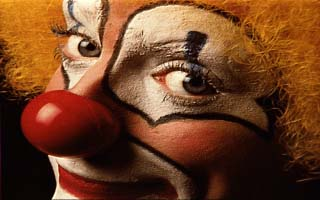

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

ij.notebook().display(input)

`invert` takes an output and input image in its simplest case:

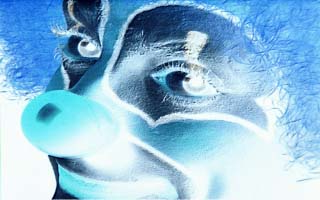

In [4]:
output = ij.op().create().img(input)

ij.op().run("invert", output, input)

ij.notebook().display(output)

If, however, it is desired to invert the image around a **different inversion point** than the middle of the type range, the user can specify a minimum and maximum value whose average becomes the new inversion point. Note that the minimum and maximum **do not** specify clamping values. For example, if it is desired to flip an 4-bit image around 4 (i.e. where 5 becomes 3) instead of around the middle value of 7.5 (i.e. where 5 becomes 10), this is possible. To perform this type of inversion the user would pass through 3 as the minimum and 5 as the maximum (or any two numbers such that the average is 4, really).

Also, note that it is possible to specify only a minimum, but it **is not** possible to specify only a maximum, due to the order of the parameters in the signature of the method.

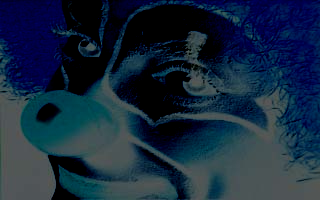

In [5]:
import net.imglib2.type.numeric.integer.IntType

//invert around 45
maxValue = new IntType(30)
minValue = new IntType(60)

ij.op().run("invert", output, input, minValue, maxValue)

ij.notebook().display(output)